#  Dünya Mutluluk Raporu Analizi (2015-2017)

In [9]:
import pandas as pd

def load_and_prepare(filepath, year, region_exists=True):
    df = pd.read_csv(filepath)
    rename_dict = {
        'Happiness Rank': 'Rank',
        'Happiness.Score': 'Score',
        'Happiness Score': 'Score',
        'Happiness.Rank': 'Rank',
        'Economy (GDP per Capita)': 'Economy',
        'Economy..GDP.per.Capita.': 'Economy',
        'Health (Life Expectancy)': 'Health',
        'Health..Life.Expectancy.': 'Health',
        'Trust (Government Corruption)': 'Trust',
        'Trust..Government.Corruption.': 'Trust',
        'Region': 'Region',
        'Family': 'Family',
        'Freedom': 'Freedom',
        'Generosity': 'Generosity',
        'Country': 'Country'
    }
    df.rename(columns=rename_dict, inplace=True)
    df['Year'] = year
    if not region_exists:
        df['Region'] = 'Unknown'
    return df[['Country', 'Region', 'Rank', 'Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Year']]

df_2015 = load_and_prepare("2015.csv", 2015, region_exists=True)
df_2016 = load_and_prepare("2016.csv", 2016, region_exists=True)
df_2017 = load_and_prepare("2017.csv", 2017, region_exists=False)

df_all = pd.concat([df_2015, df_2016, df_2017], ignore_index=True)
df_all.head()

,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


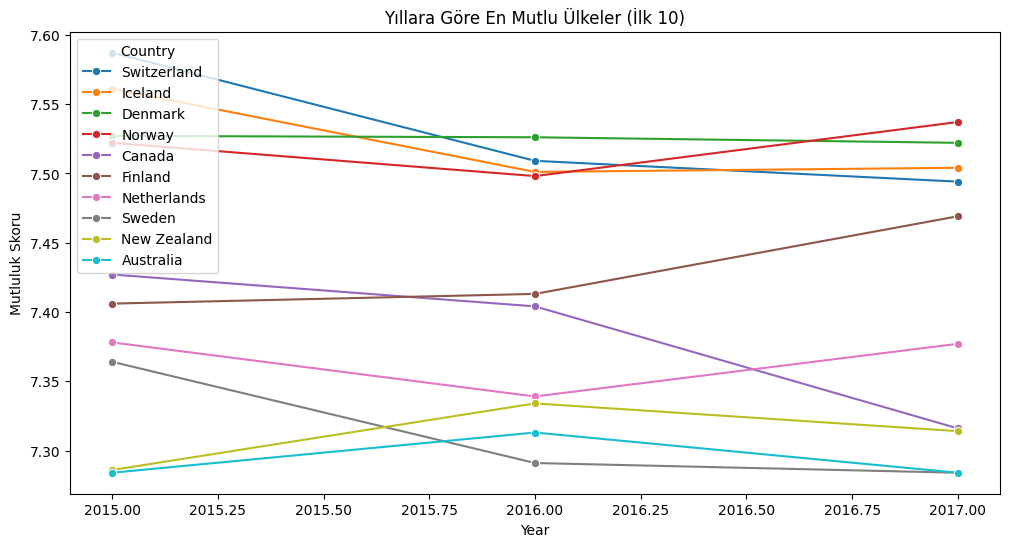

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = df_all[df_all['Rank'] <= 10]
plt.figure(figsize=(12,6))
sns.lineplot(data=top10, x='Year', y='Score', hue='Country', marker='o')
plt.title("Yıllara Göre En Mutlu Ülkeler (İlk 10)")
plt.ylabel("Mutluluk Skoru")
plt.show()

In [11]:
pivot = df_all.pivot(index='Country', columns='Year', values='Score').dropna()
pivot['Change_2015_2016'] = pivot[2016] - pivot[2015]
pivot['Change_2016_2017'] = pivot[2017] - pivot[2016]
pivot.sort_values(by='Change_2016_2017', ascending=False).head(10)

Year,2015,2016,2017,Change_2015_2016,Change_2016_2017
Country,,,,,
Bulgaria,4.218,4.217,4.714,-0.001,0.497
Afghanistan,3.575,3.360,3.794,-0.215,0.434
Syria,3.006,3.069,3.462,0.063,0.393
Egypt,4.194,4.362,4.735,0.168,0.373
South Africa,4.642,4.459,4.829,-0.183,0.370
Gabon,3.896,4.121,4.465,0.225,0.344
Uganda,3.931,3.739,4.081,-0.192,0.342
Senegal,3.904,4.219,4.535,0.315,0.316
Honduras,4.788,4.871,5.181,0.083,0.310


In [12]:
print("En çok artış gösteren ülkeler:")
display(pivot.sort_values(by='Change_2016_2017', ascending=False).head(10))

print("\nEn çok azalan ülkeler:")
display(pivot.sort_values(by='Change_2016_2017', ascending=True).head(10))

En çok artış gösteren ülkeler:


Year,2015,2016,2017,Change_2015_2016,Change_2016_2017
Country,,,,,
Bulgaria,4.218,4.217,4.714,-0.001,0.497
Afghanistan,3.575,3.360,3.794,-0.215,0.434
Syria,3.006,3.069,3.462,0.063,0.393
Egypt,4.194,4.362,4.735,0.168,0.373
South Africa,4.642,4.459,4.829,-0.183,0.370
Gabon,3.896,4.121,4.465,0.225,0.344
Uganda,3.931,3.739,4.081,-0.192,0.342
Senegal,3.904,4.219,4.535,0.315,0.316
Honduras,4.788,4.871,5.181,0.083,0.310



En çok azalan ülkeler:


Year,2015,2016,2017,Change_2015_2016,Change_2016_2017
Country,,,,,
Venezuela,6.810,6.084,5.250,-0.726,-0.834
Algeria,5.605,6.355,5.872,0.750,-0.483
Haiti,4.518,4.028,3.603,-0.490,-0.425
Zimbabwe,4.610,4.193,3.875,-0.417,-0.318
Tanzania,3.781,3.666,3.349,-0.115,-0.317
Brazil,6.983,6.952,6.635,-0.031,-0.317
Zambia,5.129,4.795,4.514,-0.334,-0.281
Panama,6.786,6.701,6.452,-0.085,-0.249
Tunisia,4.739,5.045,4.805,0.306,-0.240


In [13]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
df_2017_top = df_2017[['Country'] + factors]

for col in factors:
    print(f"{col} en yüksek: ", df_2017_top.loc[df_2017_top[col].idxmax(), 'Country'])

Economy en yüksek:  Qatar
Family en yüksek:  Iceland
Health en yüksek:  Singapore
Freedom en yüksek:  Uzbekistan
Trust en yüksek:  Singapore
Generosity en yüksek:  Myanmar
